In [1]:
from collections import defaultdict
import sys
import numpy as np
import gym
import Configuration.config as cfg
from gym_atena.envs.atena_env_cont import ATENAEnvCont
from Evaluation.notebook_utils import *
from live_recommender_agent import TFRecommenderAgent, find_latest_trained_model
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def print_bold(string):
    display(Markdown("**"+string+"**"))

def print_horizontal_line():
    display(Markdown("***"))


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Configuration loaded with:
  - humanity_coeff: 1.0
  - diversity_coeff: 2.0
  - kl_coeff: 1.5
  - compaction_coeff: 2.0
  - adam_lr: 0.0003
  - ppo_gamma: 0.995
  - ppo_lambda: 0.97
Registering ATENAcont-v0 environment
✅ Using Snorkel compatibility adapter
Configuration loaded with:
  - humanity_coeff: 1.0
  - diversity_coeff: 2.0
  - kl_coeff: 1.5
  - compaction_coeff: 2.0
  - adam_lr: 0.0003
  - ppo_gamma: 0.995
  - ppo_lambda: 0.97
✅ REWARD STABILIZER: DISABLED (stable mode like train_ipdate-1009-18:54.png)


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


# Expert Analysis of Agent Trajectories

This notebook provides expert-level analysis tools to:
- Compare agent trajectories across datasets
- Analyze action distribution patterns
- Evaluate exploration strategies
- Compare agent vs. human behavior


## Load Trained Agent


In [2]:
try:
    # Find and load model
    model_path = find_latest_trained_model()
    print(f" Using model: {model_path}")
    model_loaded = True
except FileNotFoundError:
    print("  No trained model found. Please train a model first.")
    print("   Run: python main.py")
    model_loaded = False


✅ Found latest model: results/0511-resumed/best_agent (best_agent)
✅ Using model: results/0511-resumed/best_agent


## Run Agent on Multiple Datasets

Collect trajectories from all available datasets.


In [3]:
if model_loaded:
    agent_trajectories = []
    
    for dataset_num in range(4):  # Datasets 0-3 for flights
        print_bold(f"Dataset {dataset_num}")
        
        # Create agent
        agent = TFRecommenderAgent(
            model_path=model_path,
            dataset_number=dataset_num
        )
        
        # Run episode
        info_hist, total_reward = run_episode(
            agent=agent,
            dataset_number=dataset_num,
            env=agent.env,
            most_probable=True,
            verbose=False
        )
        
        # Extract action types
        action_types = []
        for info, reward in info_hist:
            action = info['action']
            if 'back' in action.lower():
                action_types.append('back')
            elif 'filter' in action.lower():
                action_types.append('filter')
            elif 'group' in action.lower():
                action_types.append('group')
            else:
                action_types.append('other')
        
        trajectory = {
            'dataset': dataset_num,
            'info_hist': info_hist,
            'total_reward': total_reward,
            'num_steps': len(info_hist),
            'avg_reward': total_reward / len(info_hist),
            'action_types': action_types
        }
        
        agent_trajectories.append(trajectory)
        
        print(f"  Steps: {len(info_hist)}, Reward: {total_reward:.2f}")
        print_horizontal_line()
    
    print(f"\n Collected {len(agent_trajectories)} trajectories")
else:
    print("Skipping agent trajectory collection (no model loaded)")


**Dataset 0**

🔄 Loading datasets for schema: NETWORKING
































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...


✅ Datasets loaded successfully!
🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:[0 epochs]: TRAIN:[loss=76.796]
INFO:root:[10 epochs]: TRAIN:[loss=14.757]
INFO:root:[20 epochs]: TRAIN:[loss=5.235]
INFO:root:[30 epochs]: TRAIN:[loss=6.879]
INFO:root:[40 epochs]: TRAIN:[loss=5.579]
INFO:root:[50 epochs]: TRAIN:[loss=4.807]
INFO:root:[60 epochs]: TRAIN:[loss=4.741]
INFO:root:[70 epochs]: TRAIN:[loss=4.664]
INFO:root:[80 epochs]: TRAIN:[loss=4.610]
INFO:root:[90 epochs]: TRAIN:[loss=4.602]
INFO:root:Finished Training


✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🎯 Initializing ParamSoftmaxPolicy (master's SUCCESS architecture - 600 channels!)
✅ Using environment parametric segments: ((), (12, 3, 26), (12,))
✅ FFParamSoftmax network built with 2 layers x 600 units
🎯 FFParamSoftmax Policy initialized:
  - Hidden channels: 600 (master's 600)
  - Parametric segments: ((), (12, 3, 26), (12,))
  - Pre-output size: 56
  - Beta (temperature): 1.0
🏗️  Building networks...
✅ Networks built - Policy vars: 6, Value vars: 6
✅ Policy weights loaded from results/0511-resumed/best_agent (.weights.h5 format)
✅ Value weights loaded from results/0511-resumed/best_agent (.weights.h5 format)
⚠️ Failed to load model: 'NoneType' object has no attribute 'mean'
⚠️ No compatible trained model found at res

INFO:atena_env_cont:actions:[[np.int64(1), np.int64(6), np.int64(1), np.float32(11.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(1), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(2), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(9), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(1), np.float32(19.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(7), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(6), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(9), np.int64(2), np.float32(23.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(11), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(10), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [0, 0, 0, 0.5, 0, 0]]


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.013007090457000301
   total_interestingness: 0.013007090457000301
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.012436773061644061
   total_

***

**Dataset 1**

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...
INFO:root:[0 epochs]: TRAIN:[loss=69.716]
INFO:root:[10 epochs]: TRAIN:[loss=15.490]
INFO:root:[20 epochs]: TRAIN:[loss=5.181]
INFO:root:[30 epochs]: TRAIN:[loss=5.335]
INFO:root:[40 epochs]: TRAIN:[loss=5.399]
INFO:root:[50 epochs]: TRAIN:[loss=4.734]
INFO:root:[60 epochs]: TRAIN:[loss=4.472]


🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:[70 epochs]: TRAIN:[loss=4.466]
INFO:root:[80 epochs]: TRAIN:[loss=4.439]
INFO:root:[90 epochs]: TRAIN:[loss=4.421]
INFO:root:Finished Training


✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🎯 Initializing ParamSoftmaxPolicy (master's SUCCESS architecture - 600 channels!)
✅ Using environment parametric segments: ((), (12, 3, 26), (12,))
✅ FFParamSoftmax network built with 2 layers x 600 units
🎯 FFParamSoftmax Policy initialized:
  - Hidden channels: 600 (master's 600)
  - Parametric segments: ((), (12, 3, 26), (12,))
  - Pre-output size: 56
  - Beta (temperature): 1.0
🏗️  Building networks...
✅ Networks built - Policy vars: 6, Value vars: 6
✅ Policy weights loaded from results/0511-resumed/best_agent (.weights.h5 format)
✅ Value weights loaded from results/0511-resumed/best_agent (.weights.h5 format)
⚠️ Failed to load model: 'NoneType' object has no attribute 'mean'
⚠️ No compatible trained model found at res

INFO:atena_env_cont:actions:[[np.int64(1), np.int64(6), np.int64(1), np.float32(11.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(1), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(7), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(1), np.float32(7.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(1), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(3), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(9), np.int64(1), np.float32(19.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(9), np.int64(1), np.float32(19.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(10), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(9), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(9), np.int64(2), np.

🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.2516188325548359
   total_interestingness: 1.2516188325548359
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.1112213889352158
   total_intere

***

**Dataset 2**

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...
INFO:root:[0 epochs]: TRAIN:[loss=70.596]


🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:[10 epochs]: TRAIN:[loss=15.841]
INFO:root:[20 epochs]: TRAIN:[loss=5.349]
INFO:root:[30 epochs]: TRAIN:[loss=5.535]
INFO:root:[40 epochs]: TRAIN:[loss=5.622]
INFO:root:[50 epochs]: TRAIN:[loss=4.982]
INFO:root:[60 epochs]: TRAIN:[loss=4.695]
INFO:root:[70 epochs]: TRAIN:[loss=4.643]
INFO:root:[80 epochs]: TRAIN:[loss=4.616]
INFO:root:[90 epochs]: TRAIN:[loss=4.586]
INFO:root:Finished Training


✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🎯 Initializing ParamSoftmaxPolicy (master's SUCCESS architecture - 600 channels!)
✅ Using environment parametric segments: ((), (12, 3, 26), (12,))
✅ FFParamSoftmax network built with 2 layers x 600 units
🎯 FFParamSoftmax Policy initialized:
  - Hidden channels: 600 (master's 600)
  - Parametric segments: ((), (12, 3, 26), (12,))
  - Pre-output size: 56
  - Beta (temperature): 1.0
🏗️  Building networks...
✅ Networks built - Policy vars: 6, Value vars: 6
✅ Policy weights loaded from results/0511-resumed/best_agent (.weights.h5 format)
✅ Value weights loaded from results/0511-resumed/best_agent (.weights.h5 format)
⚠️ Failed to load model: 'NoneType' object has no attribute 'mean'
⚠️ No compatible trained model found at res

INFO:atena_env_cont:actions:[[np.int64(1), np.int64(6), np.int64(1), np.float32(11.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(1), np.float32(23.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(6), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(2), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(3), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(1), np.float32(23.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(1), np.float32(23.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(1), np.float32(23.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(6), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(2), np.float32(23.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(1), n

🔧 Humanity coefficient applied (same display penalty): 1.0
🚨 MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
🔧 Humanity coefficient applied (same display penalty): 1.0
🚨 MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
🔧 Humanity coefficient applied (same display penalty): 1.0
🚨 MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Rea

***

**Dataset 3**

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...
INFO:root:[0 epochs]: TRAIN:[loss=68.514]
INFO:root:[10 epochs]: TRAIN:[loss=15.432]
INFO:root:[20 epochs]: TRAIN:[loss=5.513]
INFO:root:[30 epochs]: TRAIN:[loss=5.429]
INFO:root:[40 epochs]: TRAIN:[loss=5.524]
INFO:root:[50 epochs]: TRAIN:[loss=4.860]
INFO:root:[60 epochs]: TRAIN:[loss=4.654]
INFO:root:[70 epochs]: TRAIN:[loss=

🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:Finished Training


✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🎯 Initializing ParamSoftmaxPolicy (master's SUCCESS architecture - 600 channels!)
✅ Using environment parametric segments: ((), (12, 3, 26), (12,))
✅ FFParamSoftmax network built with 2 layers x 600 units
🎯 FFParamSoftmax Policy initialized:
  - Hidden channels: 600 (master's 600)
  - Parametric segments: ((), (12, 3, 26), (12,))
  - Pre-output size: 56
  - Beta (temperature): 1.0
🏗️  Building networks...
✅ Networks built - Policy vars: 6, Value vars: 6
✅ Policy weights loaded from results/0511-resumed/best_agent (.weights.h5 format)
✅ Value weights loaded from results/0511-resumed/best_agent (.weights.h5 format)
⚠️ Failed to load model: 'NoneType' object has no attribute 'mean'
⚠️ No compatible trained model found at res

🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.2949683888126047
   total_interestingness: 1.2949683888126047
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.002, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.002, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.995460
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snor

INFO:atena_env_cont:actions:[[np.int64(1), np.int64(6), np.int64(1), np.float32(11.5), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(2), np.float32(23.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(1), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(2), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(3), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(7), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [0, 0, 0, 0.5, 0, 0], [np.int64(2), np.int64(7), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(6), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.float32(0.5), np.int64(0), np.int64(0)]]


🔧 Humanity coefficient applied (same display penalty): 1.0
🚨 MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
  Steps: 12, Reward: 20.76


***


✅ Collected 4 trajectories


## Action Distribution Analysis

Analyze how the agent distributes its actions across different types.


**Action Type Distribution Across Datasets**

,dataset,filter,group,back,other,total
0,0,3,8,1,0,12
1,1,5,7,0,0,12
2,2,7,5,0,0,12
3,3,2,9,1,0,12


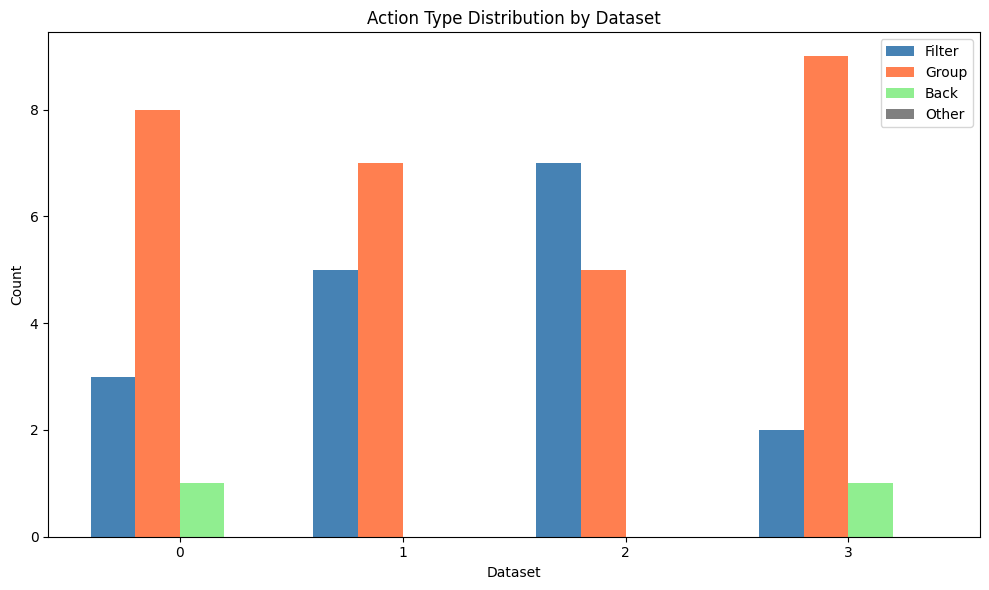

In [4]:
if model_loaded:
    print_bold("Action Type Distribution Across Datasets")
    
    action_dist_data = []
    for traj in agent_trajectories:
        from collections import Counter
        counts = Counter(traj['action_types'])
        
        action_dist_data.append({
            'dataset': traj['dataset'],
            'filter': counts.get('filter', 0),
            'group': counts.get('group', 0),
            'back': counts.get('back', 0),
            'other': counts.get('other', 0),
            'total': traj['num_steps']
        })
    
    dist_df = pd.DataFrame(action_dist_data)
    display(dist_df)
    
    # Plot action distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    
    datasets = dist_df['dataset']
    x = np.arange(len(datasets))
    width = 0.2
    
    ax.bar(x - width*1.5, dist_df['filter'], width, label='Filter', color='steelblue')
    ax.bar(x - width*0.5, dist_df['group'], width, label='Group', color='coral')
    ax.bar(x + width*0.5, dist_df['back'], width, label='Back', color='lightgreen')
    ax.bar(x + width*1.5, dist_df['other'], width, label='Other', color='gray')
    
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Count')
    ax.set_title('Action Type Distribution by Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("Action distribution analysis requires a trained model")


## Reward Analysis

Analyze reward patterns across datasets.


**Reward Statistics**

,dataset,total_reward,avg_reward,num_steps
0,0,10.355065,0.862922,12
1,1,-0.885644,-0.073804,12
2,2,-7.883564,-0.656964,12
3,3,20.762421,1.730202,12


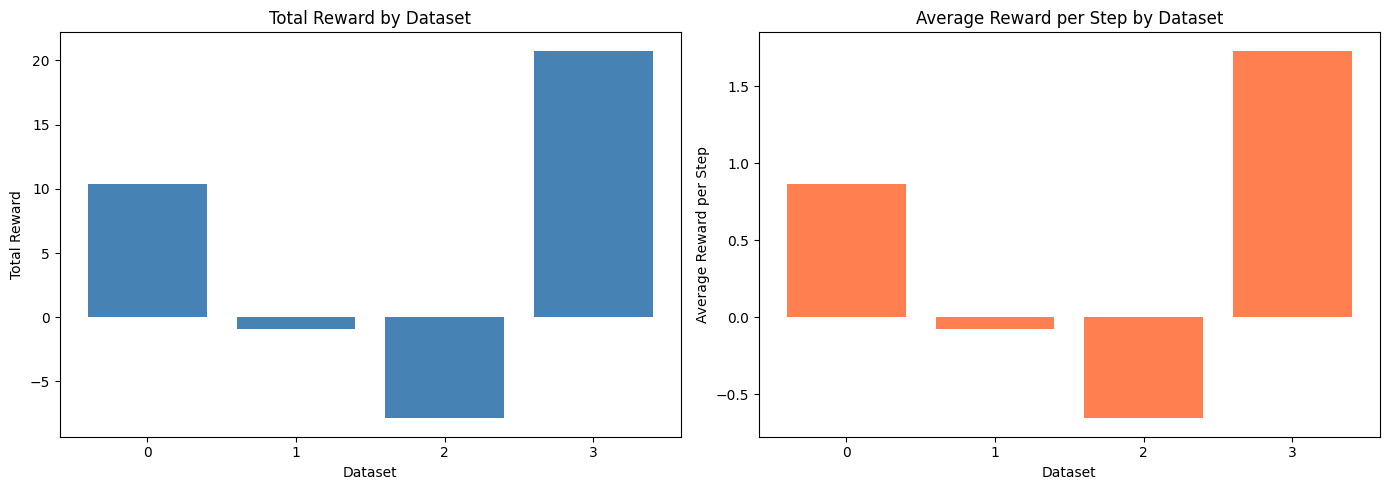

In [5]:
if model_loaded:
    print_bold("Reward Statistics")
    
    reward_data = []
    for traj in agent_trajectories:
        reward_data.append({
            'dataset': traj['dataset'],
            'total_reward': traj['total_reward'],
            'avg_reward': traj['avg_reward'],
            'num_steps': traj['num_steps']
        })
    
    reward_df = pd.DataFrame(reward_data)
    display(reward_df)
    
    # Plot rewards
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Total rewards
    axes[0].bar(reward_df['dataset'], reward_df['total_reward'], color='steelblue')
    axes[0].set_xlabel('Dataset')
    axes[0].set_ylabel('Total Reward')
    axes[0].set_title('Total Reward by Dataset')
    axes[0].set_xticks(reward_df['dataset'])
    
    # Average rewards
    axes[1].bar(reward_df['dataset'], reward_df['avg_reward'], color='coral')
    axes[1].set_xlabel('Dataset')
    axes[1].set_ylabel('Average Reward per Step')
    axes[1].set_title('Average Reward per Step by Dataset')
    axes[1].set_xticks(reward_df['dataset'])
    
    plt.tight_layout()
    plt.show()
else:
    print("Reward analysis requires a trained model")


## Detailed Trajectory Examination

Examine the full trajectory of a specific dataset.


In [6]:
if model_loaded:
    # Choose dataset to examine
    dataset_to_examine = 0
    
    print_bold(f"Detailed Trajectory for Dataset {dataset_to_examine}")
    
    traj = agent_trajectories[dataset_to_examine]
    
    print(f"Total Steps: {traj['num_steps']}")
    print(f"Total Reward: {traj['total_reward']:.2f}")
    print(f"Average Reward: {traj['avg_reward']:.2f}")
    print()
    
    # Display full session
    simulate(traj['info_hist'], displays=True, verbose=True)
else:
    print("Trajectory examination requires a trained model")


**Detailed Trajectory for Dataset 0**

Total Steps: 12
Total Reward: 10.36
Average Reward: 0.86

[np.int64(1), np.int64(6), np.int64(1), np.float32(11.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(1), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(2), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(9), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(3), np.int64(1), np.float32(19.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(7), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(6), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(5), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(1), np.int64(9), np.int64(2), np.float32(23.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(11), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[np.int64(2), np.int64(10), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)],
[0, 0, 0, 0.0

,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
0,0,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,TCP,8888?34374 [ACK] Seq=1 Ack=1 Win=65535 Len=0 T...,192.168.1.1,192.168.1.122,66,2013-06-02 10:19:14,34374,8888,0
1,1,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=256/1, ttl...",1.2.3.4,192.168.1.122,74,2013-06-02 10:19:15,-1,-1,-1
2,2,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=512/2, ttl...",82.108.24.168,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
3,3,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=768/3, ttl...",82.108.25.192,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
4,4,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1024/4, tt...",82.108.6.189,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8640,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=33820/7300...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8642,8642,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34076/7301...",82.108.187.69,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8644,8644,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34332/7302...",82.108.215.38,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8646,8646,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34588/7303...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1


action: Group on Column 'eth_dst' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: -3.0
raw action: [np.int64(2), np.int64(1), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', -2.0), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': -2.0, 'information_gain': 0})])



,packet_number
eth_dst,
00:26:b9:2b:0b:59,7832


action: Group on Column 'eth_src' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: -3.0
raw action: [np.int64(2), np.int64(2), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', -2.0), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': -2.0, 'information_gain': 0})])



,,packet_number
eth_dst,eth_src,
00:26:b9:2b:0b:59,00:0c:29:54:bf:79,7832


action: Group on Column 'tcp_dstport' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 4.375940483361915
raw action: [np.int64(2), np.int64(9), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.9133006241271486), ('kl_distance', 0), ('compaction_gain', 1.9133006241271486), ('humanity', np.float64(-0.6753303824461907)), ('snorkel_humanity', np.float64(-0.8753303824461908)), ('rules_based_humanity', 0.1), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 1.9133006241271486, 'information_gain': 0})])



packet_number
eth_dst           eth_src           tcp_dstport               
00:26:b9:2b:0b:59 00:0c:29:54:bf:79 -1                    7304
                                     139                   370
                                     445                   157
                                     34374                   1

action: Filter on Column 'highest_layer', using condition '<built-in function eq>', with term 'ICMP' , reward: 0.9634667543609283
raw action: [np.int64(1), np.int64(3), np.int64(1), np.float32(19.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.1118442475364003), ('kl_distance', 0.8516225068245279), ('compaction_gain', 0), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 1.1118442475364003, 'compaction_gain': 0, 'information_gain': 0})])



,,,packet_number
eth_dst,eth_src,tcp_dstport,
00:26:b9:2b:0b:59,00:0c:29:54:bf:79,-1,7304


action: Group on Column 'length' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 5.310971030004478
raw action: [np.int64(2), np.int64(7), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.9554855150022394), ('kl_distance', 0), ('compaction_gain', 1.9554855150022394), ('humanity', np.float64(-0.4)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -0.2), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 1.9554855150022394, 'information_gain': 0})])



packet_number
eth_dst           eth_src           tcp_dstport length               
00:26:b9:2b:0b:59 00:0c:29:54:bf:79 -1          74                  1
                                                75               7303

action: Group on Column 'ip_src' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 2.873853736789332
raw action: [np.int64(2), np.int64(6), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 1.9369268683946659), ('kl_distance', 0), ('compaction_gain', 1.9369268683946659), ('humanity', np.float64(-2.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -1.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 1.9369268683946659, 'information_gain': 0})])



packet_number
eth_dst           eth_src           tcp_dstport length ip_src                      
00:26:b9:2b:0b:59 00:0c:29:54:bf:79 -1          74     192.168.1.122              1
                                                75     192.168.1.122           7303

action: Group on Column 'ip_dst' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: -0.3752879064508705
raw action: [np.int64(2), np.int64(5), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0.013718197168580413), ('kl_distance', 0), ('compaction_gain', 0.013718197168580411), ('humanity', np.float64(-1.2763621503940157)), ('snorkel_humanity', np.float64(-0.9763621503940157)), ('rules_based_humanity', -0.15), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0.013718197168580413, 'information_gain': 0})])



packet_number
eth_dst           eth_src           tcp_dstport length ip_src        ip_dst                     
00:26:b9:2b:0b:59 00:0c:29:54:bf:79 -1          74     192.168.1.122 1.2.3.4                   1
                                                75     192.168.1.122 82.108.0.109              2
                                                                     82.108.0.11               1
                                                                     82.108.0.111              2
                                                                     82.108.0.127              2
...                                                                                          ...
                                                                     82.108.99.38              2
                                                                     82.108.99.54              2
                                                                     82.108.99.83              2
                                                                     82.108.99.86              2
                                                                     82.108.99.95              2

[3690 rows x 1 columns]

action: Filter on Column 'tcp_dstport', using condition '<built-in function eq>', with term '-1' , reward: -2.0
raw action: [np.int64(1), np.int64(9), np.int64(2), np.float32(23.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', -1.0), ('back', 0), ('diversity', -1.0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': True, 'penalty_scale_factor': 1.0}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



packet_number
eth_dst           eth_src           tcp_dstport length ip_src        ip_dst                     
00:26:b9:2b:0b:59 00:0c:29:54:bf:79 -1          74     192.168.1.122 1.2.3.4                   1
                                                75     192.168.1.122 82.108.0.109              2
                                                                     82.108.0.11               1
                                                                     82.108.0.111              2
                                                                     82.108.0.127              2
...                                                                                          ...
                                                                     82.108.99.38              2
                                                                     82.108.99.54              2
                                                                     82.108.99.83              2
                                                                     82.108.99.86              2
                                                                     82.108.99.95              2

[3690 rows x 1 columns]

action: Group on Column 'tcp_stream' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 0.7260141809140002
raw action: [np.int64(2), np.int64(11), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0.013007090457000301), ('kl_distance', 0), ('compaction_gain', 0.0130070904570003), ('humanity', np.float64(-0.8666666666666667)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -0.43333333333333335), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0.013007090457000301, 'information_gain': 0})])



packet_number
eth_dst           eth_src           tcp_dstport length ip_src        ip_dst       tcp_stream               
00:26:b9:2b:0b:59 00:0c:29:54:bf:79 -1          74     192.168.1.122 1.2.3.4      -1                      1
                                                75     192.168.1.122 82.108.0.109 -1                      2
                                                                     82.108.0.11  -1                      1
                                                                     82.108.0.111 -1                      2
                                                                     82.108.0.127 -1                      2
...                                                                                                     ...
                                                                     82.108.99.38 -1                      2
                                                                     82.108.99.54 -1                      2
                                                                     82.108.99.83 -1                      2
                                                                     82.108.99.86 -1                      2
                                                                     82.108.99.95 -1                      2

[3690 rows x 1 columns]

action: Group on Column 'tcp_srcport' and aggregate with '<built-in function len>' on the column 'packet_number' , reward: 0.7248735461232882
raw action: [np.int64(2), np.int64(10), np.int64(0), np.float32(0.0), np.int64(0), np.int64(0)]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 2.0), ('interestingness', 0.012436773061644061), ('kl_distance', 0), ('compaction_gain', 0.012436773061644063), ('humanity', np.float64(-0.8666666666666667)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', -0.43333333333333335), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 1.0, 'same_display_penalty': False, 'stabilizer_disabled': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0.012436773061644061, 'information_gain': 0})])



packet_number
eth_dst           eth_src           tcp_dstport length ip_src        ip_dst       tcp_stream tcp_srcport               
00:26:b9:2b:0b:59 00:0c:29:54:bf:79 -1          74     192.168.1.122 1.2.3.4      -1         -1                       1
                                                75     192.168.1.122 82.108.0.109 -1         -1                       2
                                                                     82.108.0.11  -1         -1                       1
                                                                     82.108.0.111 -1         -1                       2
                                                                     82.108.0.127 -1         -1                       2
...                                                                                                                 ...
                                                                     82.108.99.38 -1         -1                       2
                                                                     82.108.99.54 -1         -1                       2
                                                                     82.108.99.83 -1         -1                       2
                                                                     82.108.99.86 -1         -1                       2
                                                                     82.108.99.95 -1         -1                       2

[3690 rows x 1 columns]

action: Back , reward: 0.0
raw action: [0, 0, 0, 0.0, 0, 0]
dict_items([('empty_display', 0), ('empty_groupings', 0), ('same_display_seen_already', 0), ('back', 0), ('diversity', 0), ('interestingness', 0), ('kl_distance', 0), ('compaction_gain', 0), ('humanity', np.float64(0.0)), ('snorkel_humanity', np.float64(0.0)), ('rules_based_humanity', 0.0), ('human_sessions_similarity', 0), ('coherency_score', 0), ('readability_score', 0), ('diversity_components', {'display_distance': 0.0, 'same_display_penalty': False, 'is_back_action': True}), ('interestingness_components', {'kl_divergence': 0, 'compaction_gain': 0, 'information_gain': 0})])



packet_number
eth_dst           eth_src           tcp_dstport length ip_src        ip_dst       tcp_stream               
00:26:b9:2b:0b:59 00:0c:29:54:bf:79 -1          74     192.168.1.122 1.2.3.4      -1                      1
                                                75     192.168.1.122 82.108.0.109 -1                      2
                                                                     82.108.0.11  -1                      1
                                                                     82.108.0.111 -1                      2
                                                                     82.108.0.127 -1                      2
...                                                                                                     ...
                                                                     82.108.99.38 -1                      2
                                                                     82.108.99.54 -1                      2
                                                                     82.108.99.83 -1                      2
                                                                     82.108.99.86 -1                      2
                                                                     82.108.99.95 -1                      2

[3690 rows x 1 columns]

Total Reward: 10.355064812685862


## Compare Agent vs. Human Sessions

Load human sessions and compare with agent behavior.


**Agent vs. Human Comparison**

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...
INFO:root:[0 epochs]: TRAIN:[loss=72.588]
INFO:root:[10 epochs]: TRAIN:[loss=15.175]
INFO:root:[20 epochs]: TRAIN:[loss=4.970]
INFO:root:[30 epochs]: TRAIN:[loss=5.826]
INFO:root:[40 epochs]: TRAIN:[loss=5.548]
INFO:root:[50 epochs]: TRAIN:[loss=4.827]
INFO:root:[60 epochs]: TRAIN:[loss=4.641]
INFO:root:[70 epochs]: TRAIN:[loss=

🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]
✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.005, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.9823869540707095
   total_interestingness: 1.9823869540707095
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions:

INFO:atena_env_cont:actions:[[np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(6), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(6), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(1), np.int64(4), np.int64(6), np.int64(8), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(5), np.int64(50), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(1), np.int64(3), np.int64(5), np.int64(24), np.int64(0), np.int64(0)], [np.int64(1), np.int64(9), np.int64(0), np.int64(28), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int6

✅ Real Snorkel predictions: mean=0.002, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.995663
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.995663
🎯 Snorkel humanity: -0.995663
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 0.7234522470896284
   compaction_gain: 0
   total_interestingness: 0.7234522470896284
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.002, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL 

INFO:atena_env_cont:actions:[[np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(6), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(3), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(9), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(1), np.int64(5), np.int64(0), np.int64(112), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64

🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.001, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.017473731792566942
   total_interestingness: 0.017473731792566942
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.001, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.997683
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.997683
🎯 Snorkel humanity: -0.997683
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.001, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.001, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.997194
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff:

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
INFO:atena_env_cont:actions:[[np.int64(2), np.int64(3), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(6), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0

🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.001, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.01704830516809887
   total_interestingness: 0.01704830516809887
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.001, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.997726
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.997726
🎯 Snorkel humanity: -0.997726
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.001, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.001, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.997194
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r

,session_id,type,dataset,num_steps,total_reward,avg_reward
0,1,human,0,2,6.418638,3.209319
1,2,human,0,21,-30.006774,-1.428894
2,7,human,0,15,0.751351,0.050090
3,9,human,1,8,14.876219,1.859527
4,11,human,0,6,7.769630,1.294938
5,agent_0,agent,0,12,10.355065,0.862922
6,agent_1,agent,1,12,-0.885644,-0.073804
7,agent_2,agent,2,12,-7.883564,-0.656964
8,agent_3,agent,3,12,20.762421,1.730202


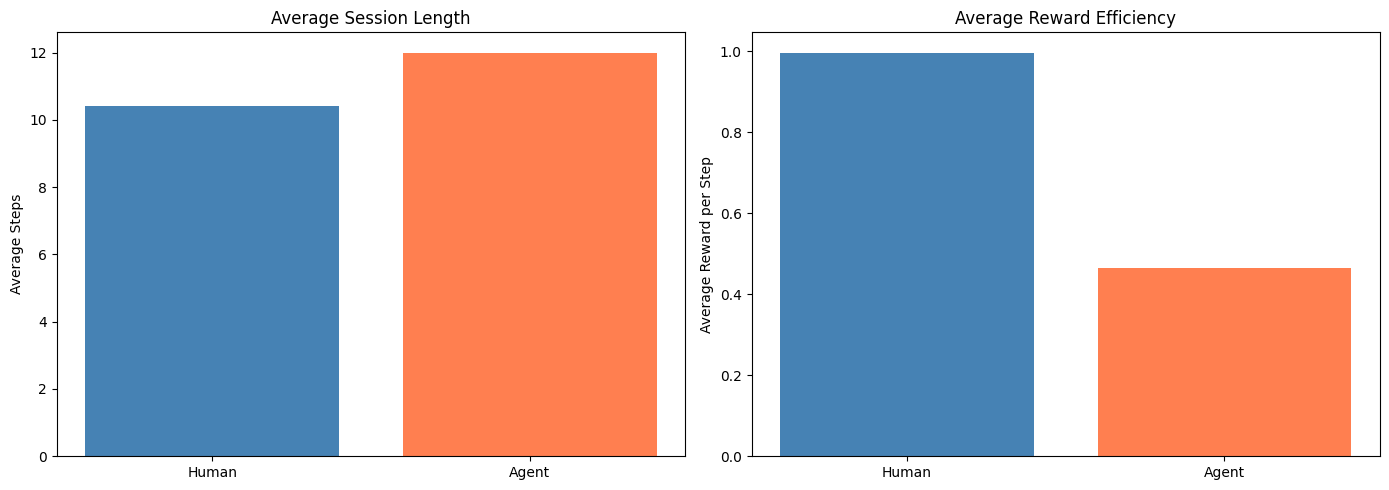

In [7]:
print_bold("Agent vs. Human Comparison")

try:
    # Load human sessions
    repo = Repository(
        'gym_atena/reactida/session_repositories/actions_atena.tsv',
        'gym_atena/reactida/session_repositories/displays.tsv',
        'gym_atena/reactida/raw_datasets/'
    )
    
    solutions_df, solutions_ids = get_solution_sessions_dfs_and_id(repo)
    
    # Sample a few human sessions
    env = gym.make(env_d)
    human_results = []
    
    for sol_id in list(solutions_ids)[:5]:  # First 5 human sessions
        try:
            action_vecs, actions_lst, dataset_id, num_steps = get_solution_details(
                sol_id, solutions_df, verbose=False
            )
            info_hist, total_reward = run_human_session(
                env, action_vecs, dataset_id, verbose=False
            )
            
            human_results.append({
                'session_id': sol_id,
                'type': 'human',
                'dataset': dataset_id,
                'num_steps': num_steps,
                'total_reward': total_reward,
                'avg_reward': total_reward / num_steps if num_steps > 0 else 0
            })
        except:
            continue
    
    # Agent results (if available)
    if model_loaded:
        agent_results = [{
            'session_id': f"agent_{t['dataset']}",
            'type': 'agent',
            'dataset': t['dataset'],
            'num_steps': t['num_steps'],
            'total_reward': t['total_reward'],
            'avg_reward': t['avg_reward']
        } for t in agent_trajectories]
        
        # Combine results
        all_results = human_results + agent_results
        comparison_df = pd.DataFrame(all_results)
        
        print("Comparison Summary:")
        display(comparison_df)
        
        # Plot comparison
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        human_df = comparison_df[comparison_df['type'] == 'human']
        agent_df = comparison_df[comparison_df['type'] == 'agent']
        
        # Steps comparison
        axes[0].bar(['Human', 'Agent'], 
                    [human_df['num_steps'].mean(), agent_df['num_steps'].mean()],
                    color=['steelblue', 'coral'])
        axes[0].set_ylabel('Average Steps')
        axes[0].set_title('Average Session Length')
        
        # Reward comparison
        axes[1].bar(['Human', 'Agent'],
                    [human_df['avg_reward'].mean(), agent_df['avg_reward'].mean()],
                    color=['steelblue', 'coral'])
        axes[1].set_ylabel('Average Reward per Step')
        axes[1].set_title('Average Reward Efficiency')
        
        plt.tight_layout()
        plt.show()
    else:
        print("Agent data not available for comparison")
        
except Exception as e:
    print(f"Could not load human sessions: {e}")
    print("Ensure human session data is available in gym_atena/reactida/")
